# South Africa's Languages

Paulina Kolobe

### Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government





<img src="https://eduvationnet.co.za/wp-content/uploads/2020/02/Untitled-design-3.png" >

### problem statement

Take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

### Table of contents

- [Imports](#section-one)
- [Loading data](#section-two)
- [Exploratory data Analysis](#section-three)
- [Data Engineering](#section-four)
- [Modelling](#section-five)
- [Prediction](#section-six)
- [Hyperparameter Tuning](#section-seven)

<a id="section-one"></a>
## Imports

In [46]:
# Import libraries for Natural Languge Processing
import re
import time
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Import Libraries for Data Visualisation
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
#from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

#Import library for train test split
from sklearn.model_selection import train_test_split

# Import Machine Learning algorithms
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Import libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

[nltk_data] Downloading package stopwords to C:\Users\Pauline
[nltk_data]     Kolobe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Pauline
[nltk_data]     Kolobe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a id="section-two"></a>
## Loading data

In [47]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [48]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [49]:
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


<a id="section-three"></a>
## Exploratory Data Analysis

In [51]:
print(train.shape)
print(test.shape)

(33000, 2)
(5682, 2)


###### Observations:

- The train dataset has 2 columns and 33000 rows
- The test dataset has 2 columns and 5682 rows

In [52]:
train.info()

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


###### Observations:
 
- From both train and test data,we can see that we have no missing values

In [53]:
train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


###### Observations:

- We have 33000 number of text
- There are 29948 unique text
- The top text has a lang_id xhosa
- The most frequent language is in lang_id 3000 and it appears 17 times 

<AxesSubplot:xlabel='lang_id', ylabel='count'>

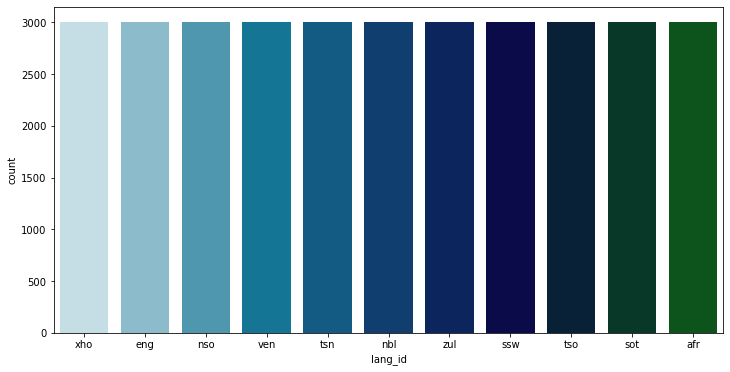

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(x='lang_id', data=train, palette ='ocean_r')

##### Text Processing

This function uses regular expressions to:
    
- Remove html characters
- Punctuation, numbers and any extra white space from each text
- Converts them to lowercase.

In [55]:
def clean_text(text):
    '''Make text lowercase,remove htnls, remove extra white space in text,remove punctuation,remove numbers
    and split the text to join words.'''    

#remove urls
    text = text=re.sub('<.*?>', ' ', text)
    
# Remove numbers
    text = re.sub(r'\d+', ' ', text)
    
# will replace newline with space
    text = re.sub("\n"," ",text)
    
# will convert to lower case
    text = text.lower()
    
# will split and join the words
    text=' '.join(text.split())
    return text

#remove stop words
def remove_stop_words(x):
    return [y for y in x if y not in stopwords.words('english')]

In [56]:
# Apply clean_text function 
train['text'] = train['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)

In [57]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [58]:
# Replace '.txt' with 'text file'
train["text"] = train["text"].str.replace(".txt", " text file")
test["text"] = test["text"].str.replace(".txt", " text file")

#### Tokenisizaion and Lemmatization

In [59]:
def tokenizing(text):
    """This Function breaks up text into tokens"""
    text = re.split('\W+', text)
    return text

train['tokenized_text'] = train['text'].apply(lambda x: tokenizing(x))
test['tokenized_text'] = test['text'].apply(lambda x: tokenizing(x))

#Lemmatization
tokens = train['tokenized_text']
tokens_test = test['tokenized_text']

lemmatizer = WordNetLemmatizer()

tokens = tokens.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokens_test = tokens_test.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

train['lemmatized_text'] = tokens
train['text_cleaned']=train['lemmatized_text']
train['text_cleaned'] = [' '.join(map(str, i)) for i in train['text_cleaned']]
test['lemmatized_text'] = tokens_test


In [60]:
train.head()

,lang_id,text,tokenized_text,lemmatized_text,text_cleaned
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[o, netefatša, gore, o, ba, file, dilo, ka, mo...",o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [61]:
df = train[['lang_id', 'text_cleaned']].copy()
df.head()

,lang_id,text_cleaned
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [62]:
df_t = test[['index', 'text']].copy()
df.head()

,lang_id,text_cleaned
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="section-four"></a>
## Data Engineering

In [82]:
#separating feature and target variables
X = df['text_cleaned']
y = df['lang_id']

# Create train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)

<a id="section-five"></a>
## Modelling

In [83]:

classifiers = [LinearSVC(random_state=42),
               #SVC(),
               #DecisionTreeClassifier(),
                #RandomForestClassifier(n_estimators=100, max_depth=2,
                                     #random_state=0, class_weight="balanced"),
               LogisticRegression(random_state=42,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1e5,
                                  max_iter=4000),
               KNeighborsClassifier(n_neighbors=5),
               MultinomialNB(),
               ]

In [84]:
def models_building(classifiers, X_train, y_train, X_val, y_val):
    
    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                                       max_df=0.9,
                                                       ngram_range=(1, 2))),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)
        run_time = time.time()-start_time

        # Output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')

In [85]:
classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)
ordered_df

,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
LinearSVC,1.000000,1.000000,1.000000,20.320582
LogisticRegression,1.000000,1.000000,1.000000,355.191246
MultinomialNB,0.993329,0.993939,0.993927,10.495386
KNeighborsClassifier,0.933352,0.930303,0.929764,10.201109


<a id="section-six"></a>
## Prediction

In [86]:

mnb = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                            max_df=0.9,
                                            ngram_range=(1, 2))),
                      ('clf' , MultinomialNB())
                      ])

classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)

In [87]:
mnb.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = mnb.predict(X_val)  # predicting the fit on validation set

<a id="section-seven"></a>
## Hyperparameter Tuning

In [88]:
# Refining the train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [89]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

tuned_mnb = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(1, 2))),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

tuned_mnb.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = tuned_mnb.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_mnb))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        35
         eng       1.00      1.00      1.00        23
         nbl       1.00      1.00      1.00        30
         nso       1.00      1.00      1.00        31
         sot       1.00      1.00      1.00        33
         ssw       1.00      1.00      1.00        19
         tsn       1.00      1.00      1.00        37
         tso       1.00      1.00      1.00        25
         ven       1.00      1.00      1.00        34
         xho       1.00      1.00      1.00        42
         zul       1.00      1.00      1.00        21

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



# Creating a submission file

In [90]:
submission_df = pd.DataFrame(test['index'])
submission_df['lang_id'] = mnb.predict(test['text'])
submission_df.to_csv('first_submission.csv', index=False)